# Tuning for Performance

So far we've seen several core Keras layer types:

### A Basic Review of Layers

Convnets contain one or more of each of the following layers:


#### 1) Input layer

#### 2) Convolution (filter) layer

#### 3) Pooling layer

#### 4) ReLU (rectified linear units) layer

#### 5) Fully connected layer(s)

#### 6) Loss layer (during the training process)


There are many [more layers](http://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html) to consider. Here we'll discuss the following layers, necessary for an improved understanding of image recognition systems:

#### Dropout Layer:

[Dropout](https://keras.io/layers/core/#dropout) layers randomly set a fraction of input units to 0. during each update stage (the last step), for each training cycle. This is necessary, particularly in very deep networks, to avoid early overfitting. Much effort has gone into avoiding overfitting in deep neural networks, particulary in the development of new and improved optimization methods, but dropout layers seem to still be present everywhere. This is likely due to the research nature of neural networks: the scientific process has not eliminated one in favor of the other yet.


#### Flatten Layer:

A [flatten](https://keras.io/layers/core/#flatten) layer crushes the input (supposedly $a_{1} \times a_{2} \ldots a_{N}$ multidimensional tensors) into a single flat vector, a $1 \times \prod_{i=1}^{N} a_{i}$ row vector. Why? Almost always because we intend to pump this data into a standard dense MLP-like prediction block, with one or more hidden layers. Remember that these are commonly flat.


## Homework: Layer Construction

Layer construction for CNNs is reviewed in provided lecture notes.


## Augmenting Data to Improve Sample Depth

You'll need to do the [mandatory reading here](https://arxiv.org/pdf/1609.08764.pdf). Follow backreferences with whatever tools you have available as well. 

Why do we augment datasets? Remember in the case of images (although the argument applies to everything else) that we are constructing a parameter map in the NN of an **abstract concept**. This concept likely has an effectively unlimited number of parameters. In the ideal case, we would have at least five examples for every meaningful range of a given parameter distribution. This means **huge** datasets in the ideal case. In some cases (Google) this is possible. In most cases, it's much harder to do. 

There are two directions we can take:

1. Augmentation 
2. Enrichment

We can **augment** the dataset by adding labeled data into the training set composed of mutations, permutations, or mixes of already faithfully labeled examples, thereby capturing meaningful aspects of important parameters (at some risk of saturation) because the involved human is guaranteeing the accuracy of the enrichment (at some entry point - even if the enrichment method is automatic). This is done in one of three typical ways:

1. The researcher or endpoint user creates an augmented dataset by hand.
2. Crowdsourced human alternatives like Crowdflower or Mechanical Turk are used to augment the dataset. 
3. Semi-supervised computational methods like SMOTE (cited in above paper) are used to automatically generate a large amount of additional samples.

The most common form of enrichment is to manually add **features** to the data, using one of the above three endpoints. In unstructured (image) data we don't often want to do that because features are just columns of pixels. For image enrichment we can also add **labels** to data, although one must be careful with this, because labels need to be correct and every label needs to have sufficient examples. This can make the task much harder (as you will see in the multilabel lab).

#### Data warping

By far the most common example of augmentation in image datasets is *data warping* shown below with credit to the referenced paper. 

![data-warping](./images/datawarping.PNG)


The idea is that a human takes an image, adds some human amount of noise and blather to the image, then adds the mutated image back into the dataset. Fortunately, keras has powerful support for this process in the form of the [ImageDataGenerator()](https://keras.io/preprocessing/image/) tool:

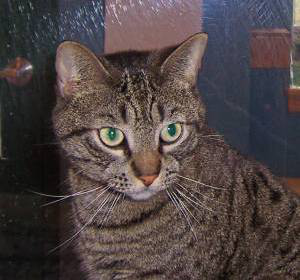

In [6]:
from IPython.display import display
import numpy as np
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from ipywidgets import interact, fixed # we will implement the interact() widget here
import ipywidgets as widgets # adding in all the other widgets.
# The keras library has an ImageDataGenerator just for this purpose.
from keras.preprocessing.image import ImageDataGenerator
img = load_img('images/cat001.jpg')
x = img_to_array(img)
img # using the __obj__ interface

Here we can define an augment_image() method that will provide a way to interface with the ImageDataGenerator() tool. With this setup we can add as many augmented images to our dataset as we wish. The interact widget will use a callback to augment_image() to produce for us any transformation we please: Rotation, Translation, Inversion, Distortion and Shear. 

In [7]:
def augment_image(key, value, sample):
    datagen = ImageDataGenerator(**{key: value})
    augmented_image = datagen.flow(np.expand_dims(x, axis=0), batch_size=1)
    x_ = next(augmented_image)[0]
    return array_to_img(x_)


In [13]:
#We can Do Rotation
interact(augment_image, key=fixed('rotation_range'), value=widgets.IntSlider(min=0, max=360, step=2), sample=True);

In [ ]:
# Width
interact(augment_image, key=fixed('width_shift_range'), value=widgets.FloatSlider(min=0, max=1, step=.01), sample=True);


In [ ]:
# Height
interact(augment_image, key=fixed('height_shift_range'), value=widgets.FloatSlider(min=0, max=1, step=.005), sample=True);

In [ ]:
# Shear
interact(augment_image, key=fixed('shear_range'), value=widgets.FloatSlider(min=0, max=1, step=.01), sample=True);

In [ ]:
# Zoom
interact(augment_image, key=fixed('zoom_range'), value=widgets.FloatSlider(min=0, max=1, step=.01), sample=True);

In [ ]:
# Horizontal Transpose
interact(augment_image, key=fixed('horizontal_flip'), value=True, sample=True);

In [ ]:
# Vertical Transpose
interact(augment_image, key=fixed('horizontal_flip'), value=True, sample=True);

## Putting it all together

All of these tools can be combined automatically within the ImageDataGenerator() to generate an entire batch of warped image files, thereby automating the process. Adding in warped examples is even beneficial when it is an option to add more data into the training set. Make sure to peruse the [documents](https://keras.io/preprocessing/image/) whenever you use it!. There are arguments for almost everything. Here we're going to set the tool loose on adding a new batch of size 1. I'll let you figure out how to change that number.

In [16]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

augmented_image = datagen.flow(np.expand_dims(x, axis=0), batch_size=1)

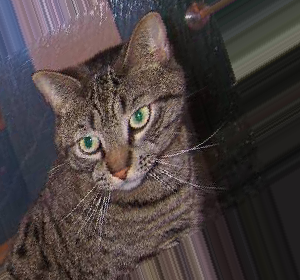

In [24]:
# This is a huge dataset and we'll need an iterator
x_ = next(augmented_image)[0]
array_to_img(x_)

## Moving On

1. Data Augmentation Lab
2. CNN Tuning Lab

### Homework

3. Multilabel lab